# Save HadCRUT timeseries to database

In [11]:
%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [12]:
import io
import os.path
import requests

import numpy.testing as npt
import pandas as pd
import scmdata
import scmdata.database

import utils

<IPython.core.display.Javascript object>

In [13]:
RAW_URL_HADCRUT4 = "https://www.metoffice.gov.uk/hadobs/hadcrut4/data/current/time_series/HadCRUT.4.6.0.0.annual_ns_avg.txt"

<IPython.core.display.Javascript object>

In [14]:
RAW_URL_HADCRUT5 = "https://www.metoffice.gov.uk/hadobs/hadcrut5/data/current/analysis/diagnostics/HadCRUT.5.0.1.0.analysis.summary_series.global.annual.csv"

<IPython.core.display.Javascript object>

In [15]:
OBS_PATH = os.path.join(utils.DATA_DIR, "processed", "observations", utils.OBS_DB_ID)

<IPython.core.display.Javascript object>

In [16]:
obs_db = scmdata.database.ScmDatabase(
    OBS_PATH,
    levels=("variable", "percentile"),
)

<IPython.core.display.Javascript object>

In [17]:
r = requests.get(RAW_URL_HADCRUT4)
r.raise_for_status()
raw = pd.read_csv(
    io.StringIO(r.content.decode("utf-8")),
    delim_whitespace=True,
    header=None,
    index_col=0,
    names=[
        "median",
        "3",
        "4",
        "5",
        "6",
        "7",
        "8",
        "9",
        "10",
        "95% CI lower all uncertainties",
        "95% CI upper all uncertainties",
    ],
)

reference_period = [1961, 1990]
# check normalised as expected
npt.assert_allclose(
    raw["median"].loc[reference_period[0] : reference_period[-1]].mean(), 0, atol=0.001
)

out_hadcrut4 = raw["median"].copy().to_frame().T.reset_index(drop=True)
out_hadcrut4["model"] = "HadCRUT.4.6.0.0"
out_hadcrut4["percentile"] = "50.0"
out_hadcrut4["reference_period_start_year"] = reference_period[0]
out_hadcrut4["reference_period_end_year"] = reference_period[1]
out_hadcrut4["region"] = "World"
out_hadcrut4["scenario"] = "historical"
out_hadcrut4["unit"] = "K"
out_hadcrut4["variable"] = "Surface Temperature (GSAT)"
out_hadcrut4 = scmdata.ScmRun(out_hadcrut4)
out_hadcrut4

<scmdata.ScmRun (timeseries: 1, timepoints: 172)>
Time:
	Start: 1850-01-01T00:00:00
	End: 2021-01-01T00:00:00
Meta:
	             model percentile  reference_period_end_year  \
	0  HadCRUT.4.6.0.0       50.0                       1990   
	
	   reference_period_start_year region    scenario unit  \
	0                         1961  World  historical    K   
	
	                     variable  
	0  Surface Temperature (GSAT)  

<IPython.core.display.Javascript object>

In [18]:
r = requests.get(RAW_URL_HADCRUT5)
r.raise_for_status()
raw = pd.read_csv(
    io.StringIO(r.content.decode("utf-8")),
    index_col=0,
)

reference_period = [1961, 1990]
# check normalised as expected
npt.assert_allclose(
    raw["Anomaly (deg C)"].loc[reference_period[0] : reference_period[-1]].mean(),
    0,
    atol=0.01,
)

out_hadcrut5 = raw["Anomaly (deg C)"].copy().to_frame().T.reset_index(drop=True)
out_hadcrut5["model"] = "HadCRUT.5.0.1.0"
out_hadcrut5["percentile"] = "50.0"
out_hadcrut5["reference_period_start_year"] = reference_period[0]
out_hadcrut5["reference_period_end_year"] = reference_period[1]
out_hadcrut5["region"] = "World"
out_hadcrut5["scenario"] = "historical"
out_hadcrut5["unit"] = "K"
out_hadcrut5["variable"] = "Surface Temperature (GSAT)"
out_hadcrut5 = scmdata.ScmRun(out_hadcrut5)
out_hadcrut5

<scmdata.ScmRun (timeseries: 1, timepoints: 173)>
Time:
	Start: 1850-01-01T00:00:00
	End: 2022-01-01T00:00:00
Meta:
	             model percentile  reference_period_end_year  \
	0  HadCRUT.5.0.1.0       50.0                       1990   
	
	   reference_period_start_year region    scenario unit  \
	0                         1961  World  historical    K   
	
	                     variable  
	0  Surface Temperature (GSAT)  

<IPython.core.display.Javascript object>

<scmdata.ScmRun (timeseries: 2, timepoints: 173)>
Time:
	Start: 1850-01-01T00:00:00
	End: 2022-01-01T00:00:00
Meta:
	             model percentile  reference_period_end_year  \
	0  HadCRUT.4.6.0.0       50.0                       1990   
	1  HadCRUT.5.0.1.0       50.0                       1990   
	
	   reference_period_start_year region    scenario unit  \
	0                         1961  World  historical    K   
	1                         1961  World  historical    K   
	
	                     variable  
	0  Surface Temperature (GSAT)  
	1  Surface Temperature (GSAT)  

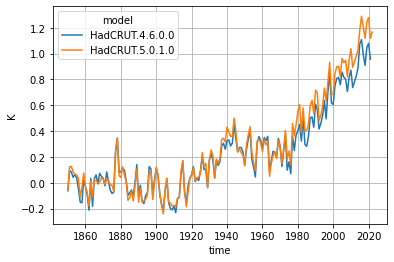

<IPython.core.display.Javascript object>

In [19]:
out = scmdata.run_append([out_hadcrut4, out_hadcrut5])
ax = out.relative_to_ref_period_mean(year=range(1850, 1900 + 1)).lineplot(hue="model")
ax.grid()
out

In [20]:
# obs_db.delete()

<IPython.core.display.Javascript object>

In [21]:
obs_db.save(out)

Saving to database: 0it [00:00, ?it/s]

<IPython.core.display.Javascript object>